In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Implementation of RDA
class RegularizedDiscriminantAnalysis:
    def __init__(self):
        self.lda = LinearDiscriminantAnalysis()
        self.qda = QuadraticDiscriminantAnalysis()

    def fit(self, X, y):
        self.lda.fit(X, y)
        self.qda.fit(X, y)
        return self

    def predict(self, X, alpha = 0.5):
        # Combine the LDA and QDA results according to the alpha value
        lda_pred = self.lda.predict_proba(X)
        qda_pred = self.qda.predict_proba(X)
        return np.argmax((1 - alpha) * lda_pred + alpha * qda_pred, axis=1)

In [5]:
# Maps for transformations
locales_map = {'af-ZA':1, 'da-DK':2, 'de-DE':3, 'en-US':4, 'es-ES':5, 'fr-FR':6, 'fi-FI':7, 'hu-HU':8, 'is-IS':9, 'it-IT':10, 'jv-ID':11, 'lv-LV':12, 'ms-MY':13,'nb-NO':14, 'nl-NL':15, 'pl-PL':16, 'pt-PT':17,'ro-RO':18, 'ru-RU':19, 'sl-SL':20, 'sv-SE':21, 'sq-AL':22, 'sw-KE':23, 'tl-PH':24, 'tr-TR':25, 'vi-VN':26, 'cy-GB':27}
locales = ['af-ZA', 'da-DK', 'de-DE', 'en-US', 'es-ES', 'fr-FR', 'fi-FI', 'hu-HU', 'is-IS', 'it-IT', 'jv-ID', 'lv-LV', 'ms-MY','nb-NO', 'nl-NL', 'pl-PL', 'pt-PT','ro-RO', 'ru-RU', 'sl-SL', 'sv-SE', 'sq-AL', 'sw-KE', 'tl-PH', 'tr-TR', 'vi-VN', 'cy-GB']
continents = {0:'Asia',1:'Africa',2:'Europe',3:'North america'}
continent_locales_map = {'af-ZA':1, 'da-DK':2, 'de-DE':2, 'en-US':3, 'es-ES':2, 'fr-FR':2, 'fi-FI':2, 'hu-HU':2, 'is-IS':2, 'it-IT':2, 'jv-ID':0, 'lv-LV':2, 'ms-MY':0,'nb-NO':2, 'nl-NL':2, 'pl-PL':2, 'pt-PT':2,'ro-RO':2, 'ru-RU':0, 'sl-SL':2, 'sv-SE':2, 'sq-AL':2, 'sw-KE':1, 'tl-PH':0, 'tr-TR':0, 'vi-VN':0, 'cy-GB':2}


In [6]:
# Data Parsing
keys = ['continents' ,'sentences']
continent_lang_train = { key : np.array([]) for key in keys}
continent_lang_validation = { key : np.array([]) for key in keys}
continent_lang_test = { key : np.array([]) for key in keys}
# Initialising np arrays to store sentences along with locale 
X_train = np.array([])
X_validation = np.array([])
X_test = np.array([])
y_train = np.array([])
y_validation = np.array([])
y_test = np.array([])
for locale in locales:
    # Reading files
    X_dataset = pd.read_csv(locale + '.csv')
    X_dataset = X_dataset.drop(X_dataset.columns[0], axis=1)
    X = np.array(X_dataset)

    train_indices  = np.where(np.array(X_dataset['partition'])=='train')
    X_train = np.append(X_train,X[train_indices][:,2])
    y_train = np.append(y_train,locales_map[locale]*np.ones(len(train_indices[0])))

    validation_indices  = np.where(np.array(X_dataset['partition'])=='validation')
    X_validation = np.append(X_validation,X[validation_indices][:,2])
    y_validation = np.append(y_validation,locales_map[locale]*np.ones(len(validation_indices[0])))

    test_indices  = np.where(np.array(X_dataset['partition'])=='test')
    X_test = np.append(X_test,X[test_indices][:,2])
    y_test = np.append(y_test,locales_map[locale]*np.ones(len(test_indices[0])))

    # Creating files to segregate languauges continentwise
    continent_lang_train['continents'] = np.append(continent_lang_train['continents'] ,continent_locales_map[locale]*np.ones(len(X[train_indices][:,2])))
    continent_lang_train['sentences'] = np.append(continent_lang_train['sentences'] ,X[train_indices][:,2])
    continent_lang_validation['continents'] = np.append(continent_lang_validation['continents'] ,continent_locales_map[locale]*np.ones(len(X[validation_indices][:,2])))
    continent_lang_validation['sentences'] = np.append(continent_lang_validation['sentences'] ,X[validation_indices][:,2])
    continent_lang_test['continents'] = np.append(continent_lang_test['continents'] ,continent_locales_map[locale]*np.ones(len(X[test_indices][:,2])))
    continent_lang_test['sentences'] = np.append(continent_lang_test['sentences'] ,X[test_indices][:,2])
    
pd.DataFrame(continent_lang_train).to_csv('continent_specific_languauges_train.csv')
pd.DataFrame(continent_lang_validation).to_csv('continent_specific_languauges_validation.csv')
pd.DataFrame(continent_lang_test).to_csv('continent_specific_languauges_test.csv')

In [7]:
# transforming the sentences into a sparse matrix of token counts.
vectorizer = CountVectorizer()
vectorizer = vectorizer.fit(X_train)
X_train_vectorsied = vectorizer.transform(X_train)
X_validation_vectorsied = vectorizer.transform(X_validation)
X_test_vectorsied = vectorizer.transform(X_test)

In [8]:
# Training Naive Bayes
X_train_shuffled, y_train_shuffled = shuffle(X_train_vectorsied, y_train)
model_NB =  MultinomialNB().fit(X_train_shuffled, y_train_shuffled)

              precision    recall  f1-score   support

         1.0       0.91      0.98      0.94      2033
         2.0       0.94      0.96      0.95      2033
         3.0       1.00      0.98      0.99      2033
         4.0       0.96      0.99      0.98      2033
         5.0       0.98      0.98      0.98      2033
         6.0       0.99      0.99      0.99      2033
         7.0       1.00      0.98      0.99      2033
         8.0       1.00      0.98      0.99      2033
         9.0       1.00      0.99      0.99      2033
        10.0       0.98      0.99      0.99      2033
        11.0       0.99      0.98      0.99      2033
        12.0       1.00      0.99      0.99      2033
        13.0       0.99      0.99      0.99      2033
        14.0       0.96      0.94      0.95      2033
        15.0       0.98      0.97      0.98      2033
        16.0       0.99      0.98      0.98      2033
        17.0       0.98      0.98      0.98      2033
        18.0       1.00    

[Text(0.5, 190.7222222222222, 'Predicted Label'),
 Text(220.72222222222223, 0.5, 'True Label')]

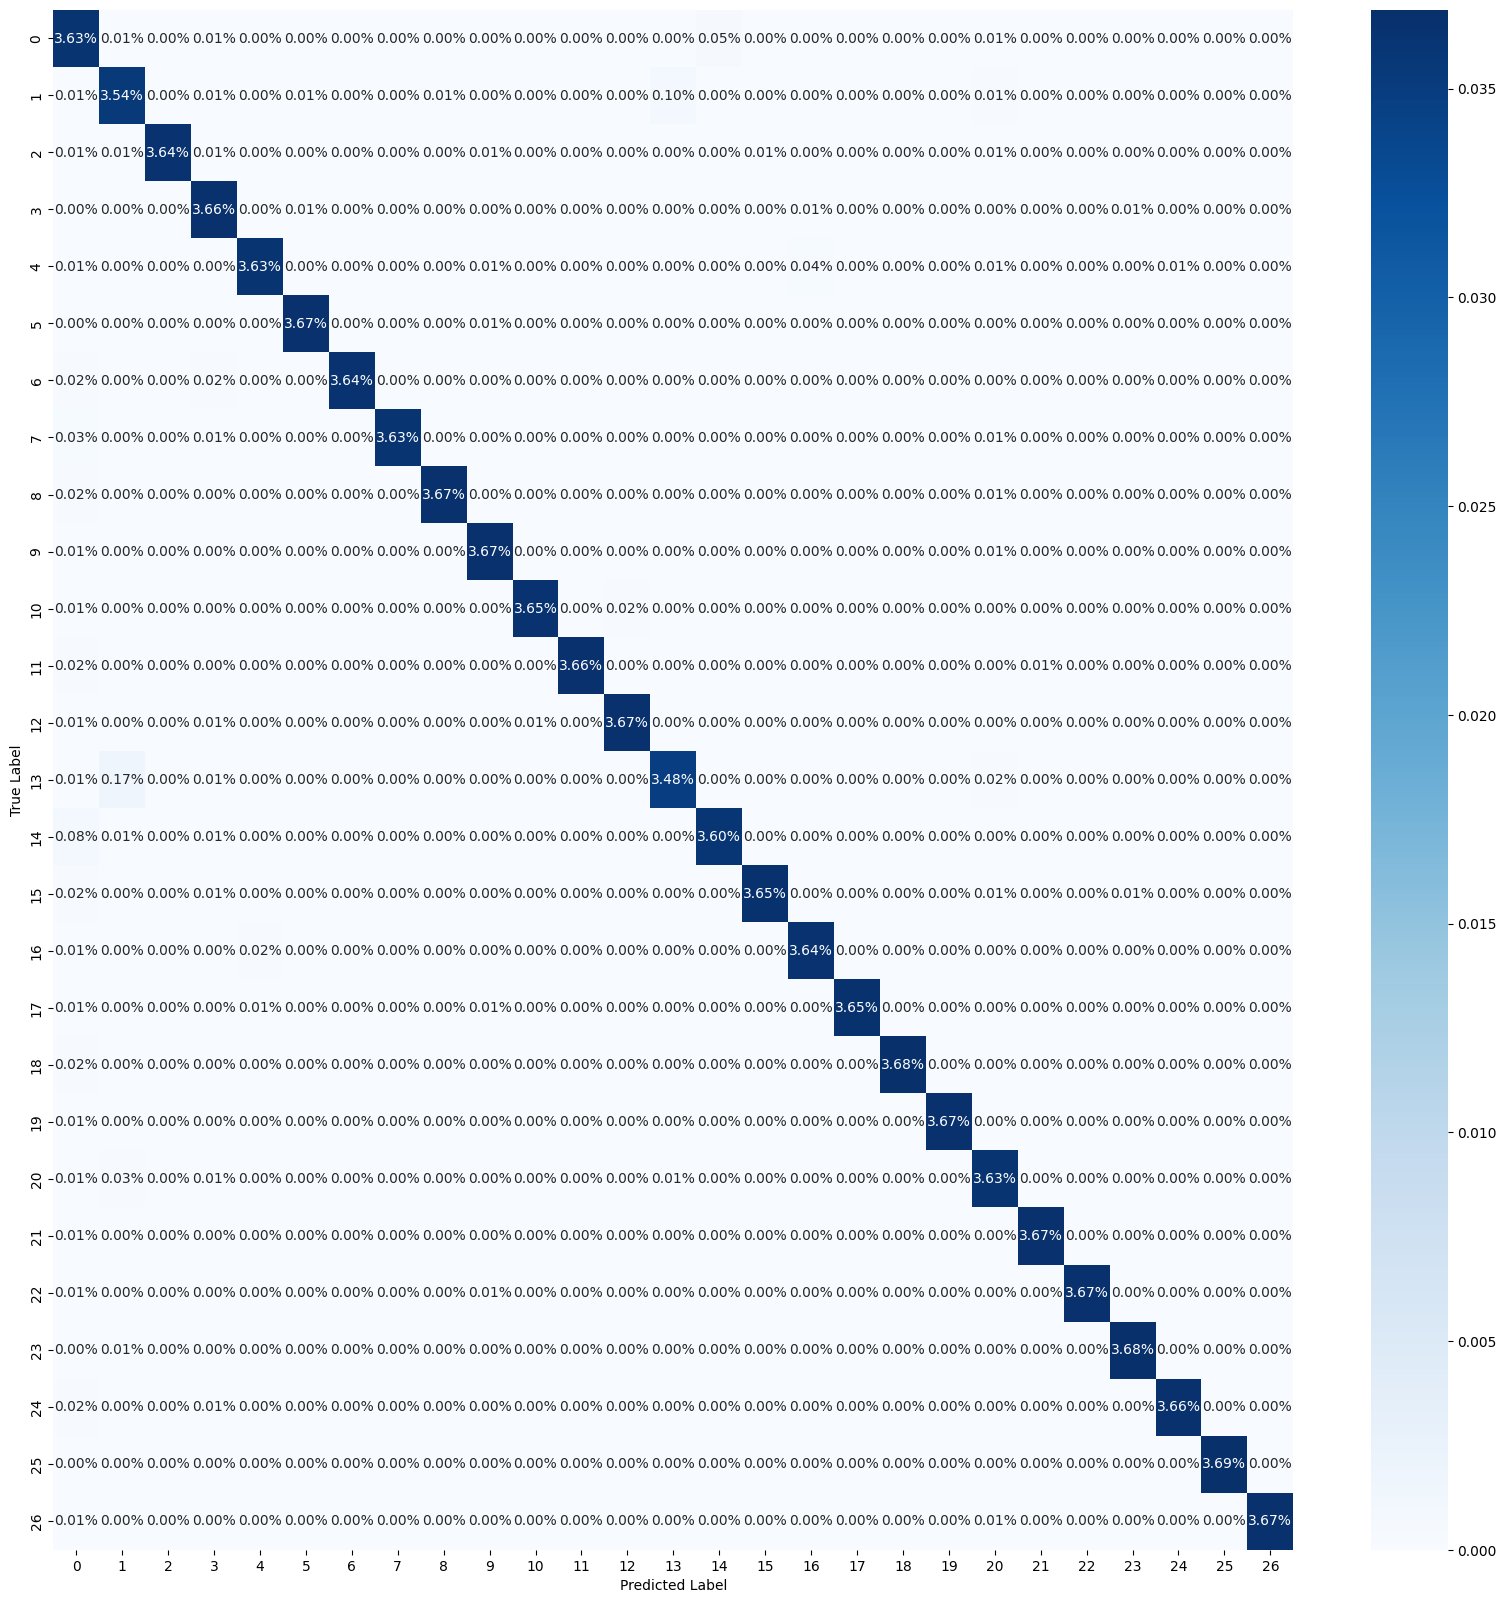

In [9]:
# Validation and testing using Naive Bayes
X_validation_shuffled, y_validation_shuffled = shuffle(X_validation_vectorsied, y_validation)
y_prediction = model_NB.predict(X_validation_shuffled)
cf_matrix = confusion_matrix(y_validation_shuffled, y_prediction)
print(classification_report(y_validation_shuffled,y_prediction))
accuracy_validation = '{}'.format(accuracy_score(y_validation_shuffled,y_prediction))
print("Accuracy of the model turns out to be " +accuracy_validation) 
fig, ax = plt.subplots(figsize=(20,20)) 
s = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',ax=ax)
s.set(xlabel='Predicted Label', ylabel='True Label')

Task 3

In [10]:
# Data Extraction
continents_data_train = pd.read_csv('continent_specific_languauges_train.csv')
X_train = np.array(continents_data_train['sentences'])
y_train = np.array(continents_data_train['continents'])
continents_data_validation = pd.read_csv('continent_specific_languauges_validation.csv')
X_validation = np.array(continents_data_validation['sentences'])
y_validation = np.array(continents_data_validation['continents'])
continents_data_test = pd.read_csv('continent_specific_languauges_test.csv')
X_test = np.array(continents_data_test['sentences'])
y_test = np.array(continents_data_test['continents'])

In [17]:
# Selecting just first 500 features for reducing the computation cost, higher k better the results
k = 500
# transforming the sentences into a sparse matrix of token counts.
vectorizer = CountVectorizer()
vectorisation_X = vectorizer.fit(X_train)
X_train_vectorsied = vectorisation_X.transform(X_train)
X_validation_vectorsied = vectorisation_X.transform(X_validation)
X_test_vectorsied = vectorisation_X.transform(X_test)
tfidf_scores = np.asarray(X_train_vectorsied.sum(axis=0)).flatten()
top_k_indices = np.argsort(tfidf_scores)[:k]

# feature selection method where k most important features (tokens) are selected based on a Chi-Square test
selector = SelectKBest(chi2, k=k)
feature_selector = selector.fit(X_train_vectorsied, y_train)
X_train_vectorsied_selected = feature_selector.transform(X_train_vectorsied)
X_validation_vectorsied_selected = feature_selector.transform(X_validation_vectorsied)
X_test_vectorsied_selected = feature_selector.transform(X_test_vectorsied)

# Fitting LDA and QDA in to our model
rda = RegularizedDiscriminantAnalysis()
rda = rda.fit(X=X_train_vectorsied_selected.toarray(),y=y_train)

c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [18]:
# Choosing optimal value of alpha for RDA
best_accuracy = 0
best_alpha = 0
for alpha in np.arange(0,1,0.2):
    y_prediction = rda.predict(X_validation_vectorsied_selected.toarray(),alpha=alpha)
    accuracy =  accuracy_score(y_validation, y_prediction)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

Accuracy of the model on test dataset turns out to be 0.9131733799712157
Best alpha of the model turns out to be 0.4 in decimal


[Text(0.5, 190.7222222222222, 'Predicted Label'),
 Text(220.72222222222223, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix (normalise across predicted values)')]

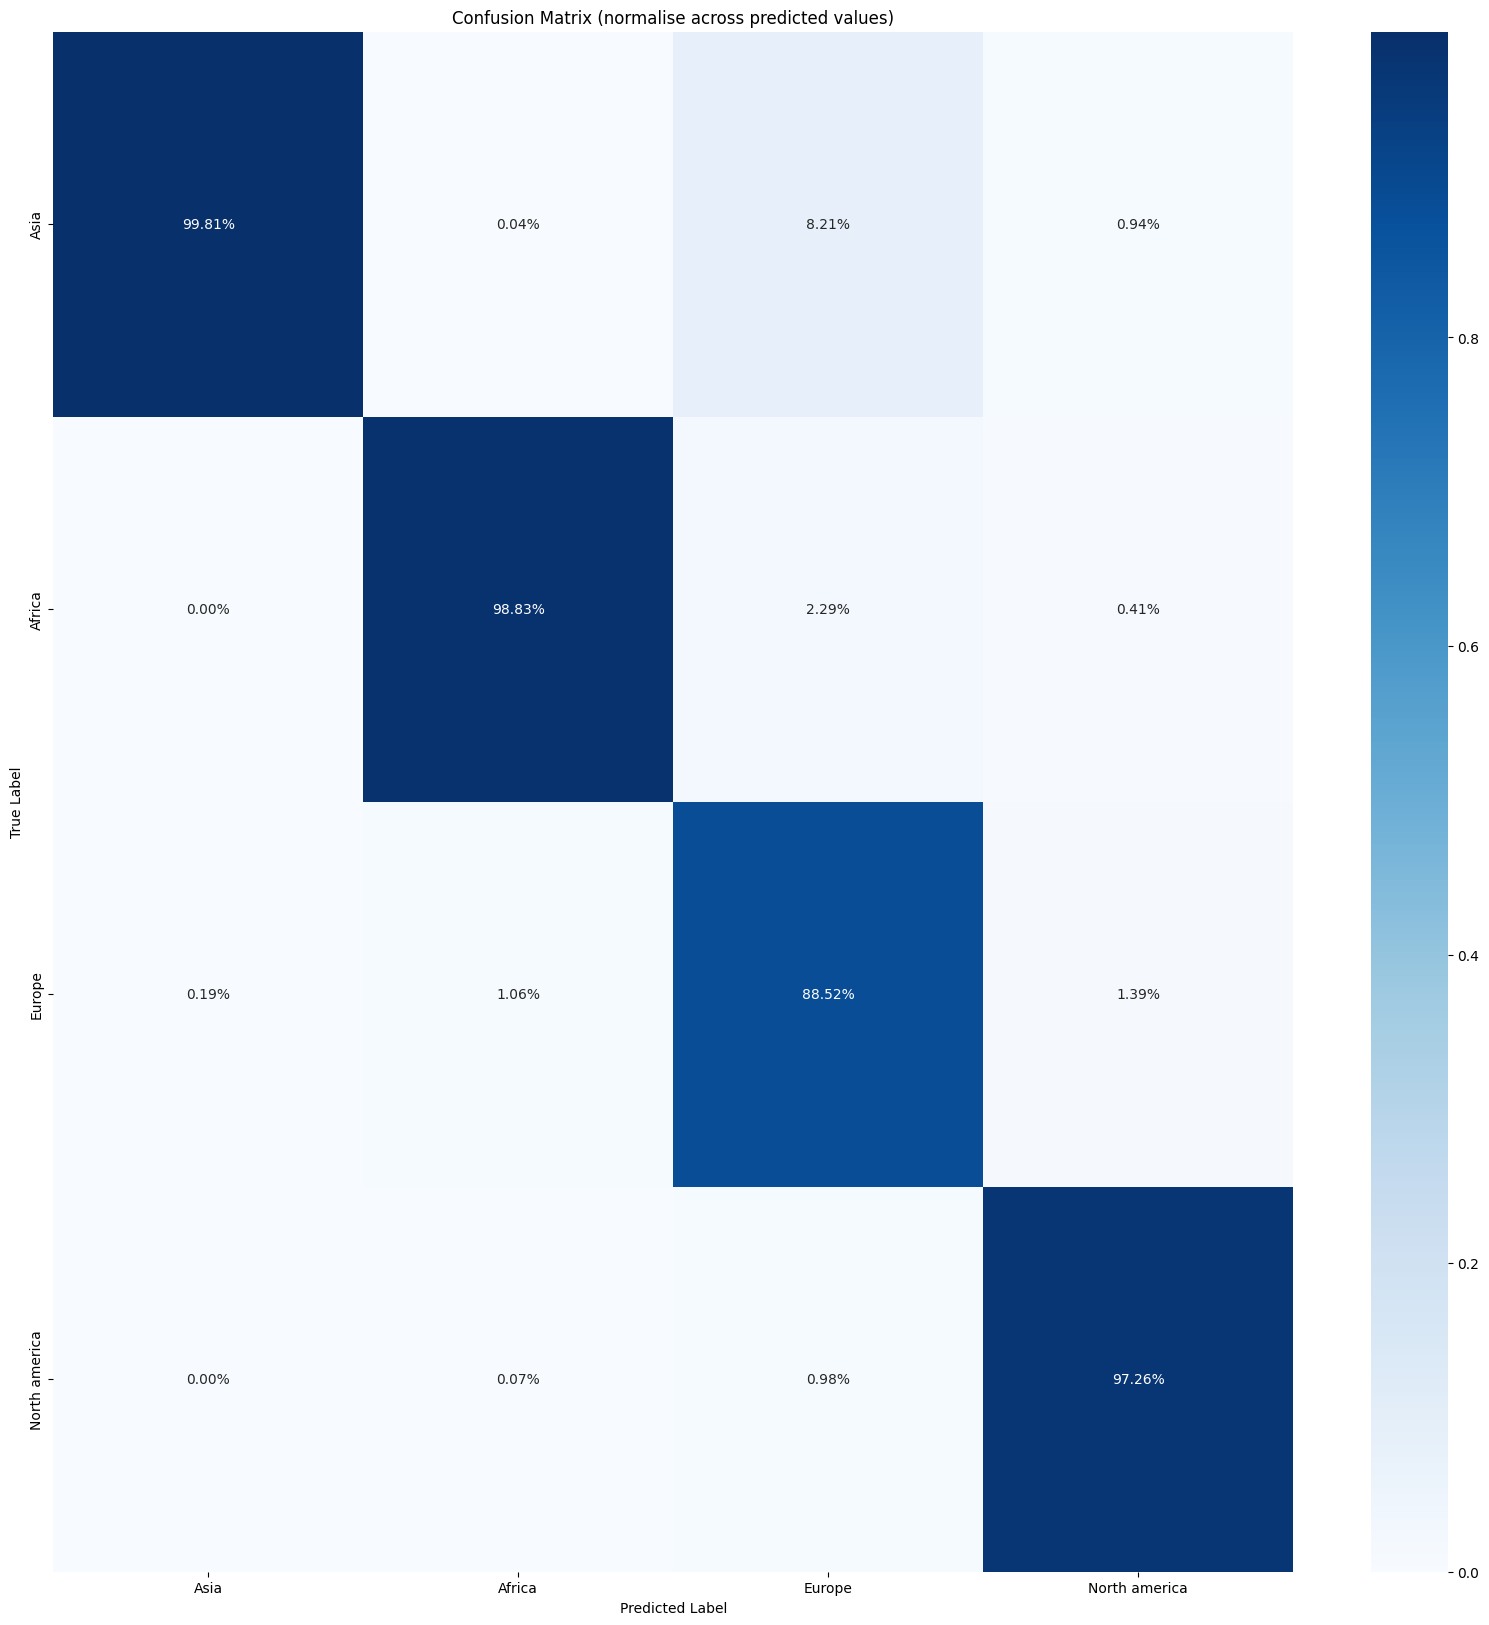

In [19]:
# Performance of RDA over test dataset
y_prediction = rda.predict(X_test_vectorsied_selected.toarray(),alpha=best_alpha)
accuracy_validation = '{}'.format(best_accuracy)
print("Accuracy of the model on test dataset turns out to be " +accuracy_validation) 
print("Best alpha of the model turns out to be " + str(best_alpha)+' in decimal')
cf_matrix = confusion_matrix(y_test, y_prediction)
fig, ax = plt.subplots(figsize=(20,20)) 
s = sns.heatmap(cf_matrix/np.sum(cf_matrix,axis=0), annot=True, fmt='.2%', cmap='Blues',ax=ax,xticklabels=continents.values(), yticklabels=continents.values())
s.set(xlabel='Predicted Label', ylabel='True Label',title='Confusion Matrix (normalise across predicted values)')

From the above results, we can see that accuracy of RDA is just 0.9131 (aproximatelty 91.3%) while Naive Bayes have accuracy of 0.9838 (approximately 98.4%). This can attributed to the fact that due to low of k (number of features extracted) the accuracy of RDA turns out to be low as compared to Naive Bayes. For RDA optimal model was abtained for alpha = 0.4.
<br>
To choose optimal regressor chi sqaure test was performed to extract the features which are specific to locale thus resulting into better accuracy inspite having just 150 features.
<br>
More regarding chi square test,<br>
The Chi-Square (χ²) test used in feature selection is a statistical test that measures the independence between two categorical variables. In the context of feature selection for text classification, it evaluates whether there is a significant relationship between each feature (word/term) and the target labels (class).